<a href="https://colab.research.google.com/github/ShubhamW248/Imgdetect/blob/main/IMDB_1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Movie Reviews Sentiment Analysis Using 1D CNN**

 **Import necessary libraires**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.optimizers import Adam

# For reproducibility
np.random.seed(7)


# Import the IMDB dataset from Keras
The IMDB dataset comes inbuilt in the Keras framework

In [2]:
top_words = 5000  # Vocabulary size
max_review_length = 500  # Maximum review length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to ensure uniform input length
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)


17464789/17464789 [==============================] - 0s 0us/step


Review Examples

In [3]:
# Get the word index
word_index = imdb.get_word_index()

# Reverse the word index to get a mapping from index to word
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '[PAD]'
index_to_word[1] = '[START]'
index_to_word[2] = '[UNK]'
index_to_word[3] = '[UNUSED]'

# Function to decode reviews
def decode_review(encoded_review):
    return ' '.join([index_to_word.get(i, '[UNK]') for i in encoded_review])

# Display a few example reviews
for i in range(3):
    print(f"Review {i + 1}:")
    print(decode_review(x_train[i]))
    print(f"Label: {y_train[i]}")
    print()
#Scroll towards right to see actual review

1641221/1641221 [==============================] - 0s 0us/step
Review 1:
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

# Model Building

In [4]:
embedding_vector_length = 50
filters = 64
kernel_size = 5
dropout_rate = 0.5

model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_rate))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           250000    
                                                                 
 conv1d (Conv1D)             (None, 500, 64)           16064     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 250)               16250     
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                        

**Training and Validation**

Epoch 1/10
391/391 - 56s - loss: 0.5203 - accuracy: 0.7185 - val_loss: 0.3252 - val_accuracy: 0.8624 - 56s/epoch - 143ms/step
Epoch 2/10
391/391 - 64s - loss: 0.2984 - accuracy: 0.8777 - val_loss: 0.2813 - val_accuracy: 0.8810 - 64s/epoch - 163ms/step
Epoch 3/10
391/391 - 51s - loss: 0.2157 - accuracy: 0.9178 - val_loss: 0.2847 - val_accuracy: 0.8834 - 51s/epoch - 130ms/step
Epoch 4/10
391/391 - 50s - loss: 0.1636 - accuracy: 0.9387 - val_loss: 0.3046 - val_accuracy: 0.8798 - 50s/epoch - 129ms/step
Epoch 5/10
391/391 - 48s - loss: 0.1242 - accuracy: 0.9540 - val_loss: 0.3390 - val_accuracy: 0.8749 - 48s/epoch - 123ms/step
Epoch 6/10
391/391 - 49s - loss: 0.0970 - accuracy: 0.9643 - val_loss: 0.3707 - val_accuracy: 0.8742 - 49s/epoch - 125ms/step
Epoch 7/10
391/391 - 51s - loss: 0.0797 - accuracy: 0.9719 - val_loss: 0.4048 - val_accuracy: 0.8688 - 51s/epoch - 130ms/step
Epoch 8/10
391/391 - 50s - loss: 0.0670 - accuracy: 0.9760 - val_loss: 0.4138 - val_accuracy: 0.8719 - 50s/epoch - 129

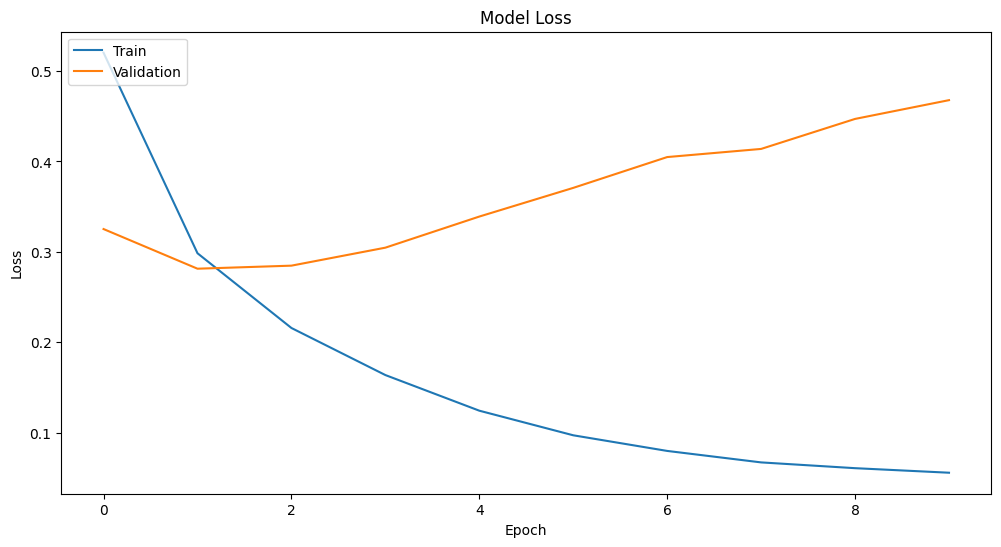

In [5]:
batch_size = 64
epochs = 10

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


We observe overfitting

In [6]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100:.2f}%")


Accuracy: 86.79%


# Re-Training a new model for better regularisation

In [7]:
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

embedding_vector_length = 50
filters = 64
kernel_size = 5
dropout_rate = 0.5
regularization_rate = 0.01

model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu', kernel_regularizer=l2(regularization_rate)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_rate))
model.add(Dense(250, activation='relu', kernel_regularizer=l2(regularization_rate)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
batch_size = 64
epochs = 10

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 50)           250000    
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           16064     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 250)               16250     
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                      

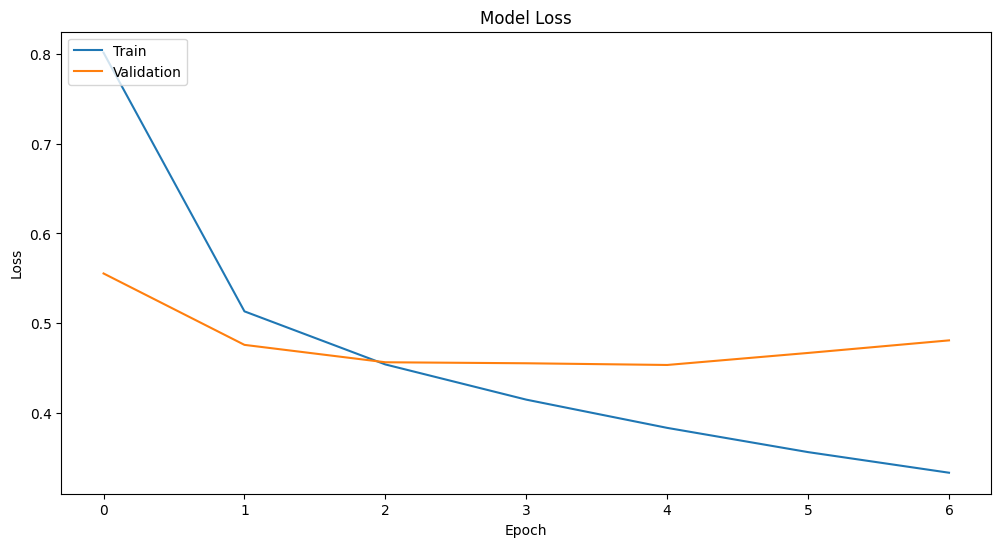

In [8]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [9]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100:.2f}%")


Accuracy: 82.04%


This model regularises better then accuracy of model is bad